<a href="https://colab.research.google.com/github/nerudesu/diabetes-prediction/blob/main/Applied_ML_Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

## Project Domain

According to ([WHO, 2023](https://www.who.int/news-room/fact-sheets/detail/diabetes))[1], diabetes is a medical condition that arises when the pancreas fails to generate sufficient insulin or when our body unable to use the insulin it produces effectively. Insulin is a hormone that responsibile for regulating blood glucose levels, it plays a crucial role in this process. Hyperglycemia, also known as elevated blood glucose or high blood sugar, is a frequent consequence of poorly managed diabetes. Over time, this condition can cause significant harm to numerous bodily systems, particularly the nerves and blood vessels.

In 2014, 8.5% of adults aged 18 years and above had diabetes. By 2019, diabetes caused 1.5 million deaths, with 48% occurring before the age of 70. Diabetes also contributed to 460,000 deaths related to kidney disease, and around 20% of cardiovascular-related deaths were linked to elevated blood glucose levels ([GBD, 2019](https://vizhub.healthdata.org/gbd-results/))[2].

Predicting diabetes based on patients' medical history and demographic information can be valuable for healthcare professionals. It helps identify individuals at risk of developing diabetes and enables the creation of personalized treatment plans for better patient care.

Researchers have employed a data-driven approach, utilizing machine learning techniques, to predict diabetes and cardiovascular disease. One study specifically utilized the National Health and Nutrition Examination Survey (NHANES) dataset to evaluate the classification performance of several machine learning models, including Logistic Regression, Support Vector Machines (SVM), Random Forest, and Gradient Boosting ([Dinh, A. et al, 2019](https://doi.org/10.1186/s12911-019-0918-5))[3].

## Business Understanding

Accurate diabetes prediction is crucial to ensure appropriate treatment and mitigate the risk of complications. In cases which little to no access to patient lab data, a way to predict using more general medical and demographic data is needed.

### Problem Statements

Based on the problems previously described, the problem statements for this project are as follows:
- What features have the most influence on determining patient diabetes?
- Which patients need special treatment to prevent diabetes at an early stage?

### Goals

The objectives from this project are as follows:
- Know features which highly correlated with the detection of a patient's diabetes.
- Develop a machine-learning model that can predict whether a patient has diabetes.

### Solution statements
The solution proposed to solve the problem is as follows:
- Exploring data and visualizing the correlation between existing features to find out the relationship between features
- Build machine learning models for classification using K-Nearest Neighbors (KNN), Random Forest, and AdaBoost with default parameters
- Comparing the evaluation of the resulting metrics and selecting the best Machine Learning model for model tuning to further improve the model

# **Import Required Libraries**

Firstly, let's import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis (EDA)**

## Data Loading

We will use Diabetes prediction dataset from Kaggle that can be accessed and downloaded from the following link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset [4]

The dataset includes medical and demographic information of patients, including their diabetes status (positive or negative). It encompasses a range of features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

In [ ]:
# Load data
# Diabetes prediction dataset downloaded from Kaggle and hosted to Google Drive for direct linking
df = pd.read_csv("https://drive.google.com/uc?id=1-fGul-oaYVaiB-lzZf8agHPGy007FVzC&export=download")

In [ ]:
# Dataframe header
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Data Exploring

In [ ]:
# Dataframe shape
df.shape

(100000, 9)

Output from above code give us following information:

1.   There are 100.000 rows of records or observation in the dataset.
2.   There are ten columns/features, as explained above.

**Variables Description**

Based on information from [Kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset) [4], variables on Diabetes prediction dataset are as follow:


1.   gender: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.
2.   age: Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80.
3.   hypertension: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
4.   heart_disease: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
5.   smoking_history: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes. There are 5 categories i.e. not current, former, No Info, current, never, and ever.
6.   bmi: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
7.   HbA1c: HbA1c (Hemoglobin A1c) level is a measure of a person’s average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes. The range of HbA1c_level in the dataset is from 3.5 to 9.
8.   blood_glucose: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.
9.   diabetes: Diabetes is the target variable being predicted. It has values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.



First let's check whether our dataset contains NA value. By ensuring the cleanliness and reliability of the data, we can reduce the bias or inaccurate analysis.

In [ ]:
# Check whether there is NA value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

There's no NA value on the dataset. Then let's check the data type

In [ ]:
# Check data type for each column
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

There are two columns (gender and smoking_history) that have non-numeric values.

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Data adjustment

Cast age (discreate) type to int and blood_glucose (continous) to float to make appropriate data representation

In [ ]:
df['age'] = df['age'].astype(int)
df['blood_glucose_level'] =  df['blood_glucose_level'].astype(float)

## Data Cleaning

In [ ]:
# Count occurrence of each value in 'smoking_history' column
counts = df.smoking_history.value_counts()

# Count occurrence of each value in 'team' column as percentage of total
percs = df.smoking_history.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# Concatenate results into one DataFrame
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

NameError: ignored

In [ ]:
# Extract labels and values from the DataFrame
labels = df['Label']
values = df['Value']

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
ax.set_title('Pie Chart')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

Majority of the smoking history's data were labeled with "No Info" and it's impossible if not difficult to make imputation for them, although they can represent a category of data, it may caused a bias in the decision. So we better remove it.

In [ ]:
df = df.drop(columns = 'smoking_history')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140.0,0
1,Female,54,0,0,27.32,6.6,80.0,0
2,Male,28,0,0,27.32,5.7,158.0,0
3,Female,36,0,0,23.45,5.0,155.0,0
4,Male,76,1,1,20.14,4.8,155.0,0


In [ ]:
# Count occurrence of each value in 'gender' column
counts = df.gender.value_counts()

# Count occurrence of each value in 'team' column as percentage of total
percs = df.gender.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

# Concatenate results into one DataFrame
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Female,58552,58.6%
Male,41430,41.4%
Other,18,0.0%


Gender with value other is in small percentage we could include them.

## Data Visualization

Correlation between variables indicates that as one variable changes, the other variable tends to change in a consistent direction. Recognizing this connection is valuable because it allows us to utilize the value of one variable to make predictions about the value of the other variable.

In [ ]:
# Correlation between features in the dataset
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


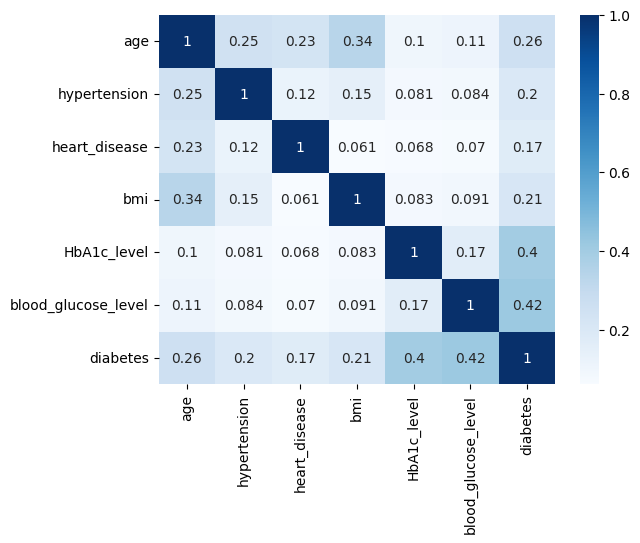

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'Blues')
plt.show()

Upon analyzing the heatmap, we can say there's no strong correlation between features. The relationship between two variables is generally considered strong when their r value is larger than 0.7 ([Moore, D. S. et al, 2013](https://books.google.co.id/books/about/The_Basic_Practice_of_Statistics.html?id=aw61ygAACAAJ&redir_esc=y))[5].

# **Modeling**

## Data Preprocessing
Preprocessing steps such as encoding categorical variables, feature scaling, and splitting the data into training and testing sets. Ensuring it's ready to be feed on ML Model for training.

### Encoding Categorical Variables
Categorical data consists of variables with label values instead of numeric values. Some machine learning algorithms are unable to process label data directly. For it to work, these algorithms require that all input and output variables be in a numeric format, this means that categorical data must be converted to a numerical form.

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140.0,0
1,Female,54,0,0,27.32,6.6,80.0,0
2,Male,28,0,0,27.32,5.7,158.0,0
3,Female,36,0,0,23.45,5.0,155.0,0
4,Male,76,1,1,20.14,4.8,155.0,0


When dealing with categorical variables that lack an ordinal relationship, applying one-hot encoding is a suitable approach. This involves converting each categorical value into a new categorical column and assigning binary values of 1 or 0 to represent the presence or absence of each category. In the specific scenario mentioned, there is one remaining categorical variable (gender) that needs to be converted using the one-hot encoding (OHE) technique.

In [ ]:
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')], axis=1)
df.drop(['gender'], axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80,0,1,25.19,6.6,140.0,0,1,0,0
1,54,0,0,27.32,6.6,80.0,0,1,0,0
2,28,0,0,27.32,5.7,158.0,0,0,1,0
3,36,0,0,23.45,5.0,155.0,0,1,0,0
4,76,1,1,20.14,4.8,155.0,0,0,1,0


### Splitting Data
Data splitting is a common practice in machine learning to prevent overfitting, which occurs when a model excessively tailors itself to the training data and struggles to generalize to new data. By dividing the data into separate sets, we can simulate how the model would perform with unseen data, providing a measure of its generalization capability.

We split the data into train data and test data with ratio 80:20.

In [ ]:
X = df.drop(['diabetes'], axis= 1)
y = df['diabetes']

# We will use 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 9)
(80000,)
(20000, 9)
(20000,)


### Feature Scaling

Feature scaling involves normalizing the range of features in a dataset. Since real-world datasets often consist of features with varying magnitudes, ranges, and units, it is necessary to perform feature scaling to ensure machine learning models can interpret these features on a consistent scale. We do feature scaling on numeric variables from our data.

In [ ]:
# List of numeric variables
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)

['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Female', 'gender_Male', 'gender_Other']


In [ ]:
# Standardizing the data
scaler = StandardScaler()

#scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test[numerical_features] = scaler.transform(X_test)

In [ ]:
X_train[numerical_features].head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other
91526,-0.214566,-0.284439,-0.201552,-0.198072,0.532067,0.537878,0.840830,-0.840548,-0.012749
19416,-1.723493,-0.284439,-0.201552,-1.022315,0.906184,-0.931941,-1.189302,1.189700,-0.012749
99079,-1.146550,-0.284439,-0.201552,-1.863133,0.906184,-0.931941,0.840830,-0.840548,-0.012749
45086,-1.812254,-0.284439,-0.201552,-1.566285,-0.964402,0.513381,0.840830,-0.840548,-0.012749
54659,1.028080,-0.284439,4.961491,0.689458,0.999714,0.047938,-1.189302,1.189700,-0.012749


In [ ]:
X_train[numerical_features].describe().round(4)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other
count,80000.0000,80000.0000,80000.0000,80000.0000,80000.0000,80000.0000,80000.0000,80000.0000,80000.0000
mean,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.8566,-0.2844,-0.2016,-2.6105,-1.8997,-1.4219,-1.1893,-0.8405,-0.0127
25%,-0.7915,-0.2844,-0.2016,-0.5552,-0.6838,-0.9319,-1.1893,-0.8405,-0.0127
50%,0.0517,-0.2844,-0.2016,-0.0022,0.2515,0.0479,0.8408,-0.8405,-0.0127
75%,0.7618,-0.2844,-0.2016,0.3459,0.6256,0.5134,0.8408,1.1897,-0.0127
max,1.6938,3.5157,4.9615,10.3001,3.2444,3.9675,0.8408,1.1897,78.4401


Next we will build several model to train with their **default hyperparameters value** and compare **which one will give the best result**.

In [ ]:
# Dictionary to store the results
results = {}

## K-Nearest Neighbors (KNN)

KNN is a supervised learning algorithm capable of addressing both regression and classification problems. It attempts to predict the appropriate class for test data by evaluating the distance between the test data and all the training points.

**Advantages:**
-   Easy to implement
-   No training period (data itself is a model which will be refference for future prediction)
-   New data can be added at any time (it won't affect the model)

**Disadvantages:**
-   Doesn't work well with large dataset (calculating distances between each data would be very costly)
-   Doesn't work well with high dimensionality (complicated distance calculating process)
-   Sensitive to noisy and missing data
-   Data in all dimension should be scaled (normalized and standardized) properly

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred, average='weighted'),
                                        recall_score(y_test, y_pred, average='weighted'),
                                        f1_score(y_test, y_pred, average='weighted')]

## Random Forest

Random forests, also known as random decision forests, are a type of ensemble learning approach used for various tasks such as classification, regression, and more. They work by creating numerous decision trees during the training phase. In the case of classification tasks, the random forest's final output is determined by the class that is chosen by the majority of the trees.

**Advantages:**
-    Reduces overfitting in decision trees and enhances accuracy.
-    Effective with both categorical and continuous values.
-    Does not require data normalization, as it utilizes a rule-based approach.

**Disadvantages:**
-    Requires much computational power as it build numerous trees to combine their output
-    Due to the combination of numerous decision trees to determine the class, the training process of this approach demands a significant amount of time.
-    The ensemble of decision trees in this method hinders interpretability and prevents the determination of the individual significance of each variable.

In [ ]:
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'),
                            f1_score(y_test, y_pred, average='weighted')]

## AdaBoost

Adaptive Boosting is an ensemble method used in machine learning. It combines multiple weak classifiers by adjusting the weights of the training samples based on their classification error.

**Advantages:**
-     Adaboost is less susceptible to overfitting since the input parameters are not jointly optimized.
-     The accuracy of weak classifiers can be enhanced through the utilization of Adaboost.

**Disadvantages:**
-     Adaboost requires a high-quality dataset. It is necessary to avoid noisy data and outliers prior to implementing an Adaboost algorithm.


In [ ]:
ada = AdaBoostClassifier(random_state=7)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                       precision_score(y_test, y_pred, average='weighted'),
                       recall_score(y_test, y_pred, average='weighted'),
                       f1_score(y_test, y_pred, average='weighted')]

# **Evaluation**

We compare the accuracy and other metrics to determine the most effective model for predicting diabetes.


In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors (KNN),0.96435,0.962654,0.96435,0.961790
Random Forest,0.96830,0.967146,0.96830,0.966169
AdaBoost,0.97150,0.971428,0.97150,0.969222


First we discussed about the outcome of predicted result:

*   A person who is actually diabetes (positive) and classified as diabetes (positive). This is called TRUE POSITIVE (TP).
*   A person who is actually not diabetes (negative) and classified as not diabetes (negative). This is called TRUE NEGATIVE (TN).
*   A person who is actually not diabetes (negative) and classified as diabetes (positive). This is called FALSE POSITIVE (FP).
*   A person who is actually diabetes (positive) and classified as not diabetes (negative). This is called FALSE NEGATIVE (FN).

The Result Dataframe provides accuracy, precision, recall, and F1 values for each tested model.
1.   **Accuracy**

    It represents the ratio of accurately classified data instances to the total of data instances.
  $$Precision=\dfrac{TN+TP}{TN+FP+TP+FN}$$
    
    Accuracy may not be a good measure if the dataset is imbalanced (the negative and positive classes have unequal data instances).
    
2.   **Precision**

    It represents the ratio between the True Positive (TP) and the amount of data that is predicted to be positive.
  $$Precision=\dfrac{TP}{TP+FP}$$

3.   **Recall**

    Comparison between True Positive (TP) with the amount of data that is actually positive.
  $$Recall=\dfrac{TP}{TP+FN}$$

4.   **F1**

    The F1 score combines precision and recall into a single metric, providing an overall assessment of performance. A higher F1 score indicates better performance in terms of both precision and recall, making it a favorable criterion for evaluating models.
  $$F1=2\,\,\dfrac{Precision*Recall}{Precision+Recall}$$


From the models performance comparisson we can see **AdaBoost Model demonstrate the highest Accuracy and the highest F1 score**. Thus it become our preferred model. Next we will fine tune the parameters to improve the results.

# **Model Tuning**

We will try to improve the result from our AdaBoost Model by tuning the hyperparameters.

These are the parameters (excluding random_state) from the [scikit documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) that we could try adjust:
-   **estimator : *object, default=None***
    
    The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
-   **n_estimators : *int, default=50***

    The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range [1, inf).

-   **learning_rate : *float, default=1.0***

    Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range (0.0, inf).

-   **algorithm : *{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’***

    If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

First we try to increase n_estimators value doubling from their default value of 50 to 100, and we half the learning rate to 0.5.

In [ ]:
ada_tune = AdaBoostClassifier(estimator=None,
                              n_estimators=100,
                              learning_rate=0.5,
                              algorithm='SAMME.R',
                              random_state=7)

ada_tune.fit(X_train, y_train)
y_pred = ada_tune.predict(X_test)

results['AdaBoost-Tune'] = [accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'),
                            f1_score(y_test, y_pred, average='weighted')]

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors (KNN),0.96435,0.962654,0.96435,0.961790
Random Forest,0.96830,0.967146,0.96830,0.966169
AdaBoost,0.97150,0.971428,0.97150,0.969222
AdaBoost-Tune,0.97185,0.972226,0.97185,0.969420


We can see there's slight improvement on the model with tuned parameters. Now we try to fine tune again to further improve the model by multiplying the n_estimators to 500 and set learning rate to 0.75.

In [ ]:
ada_tune_2 = AdaBoostClassifier(estimator=None,
                              n_estimators=500,
                              learning_rate=0.75,
                              algorithm='SAMME.R',
                              random_state=7)

ada_tune_2.fit(X_train, y_train)
y_pred = ada_tune_2.predict(X_test)

results['AdaBoost-Tune_2'] = [accuracy_score(y_test, y_pred),
                            precision_score(y_test, y_pred, average='weighted'),
                            recall_score(y_test, y_pred, average='weighted'),
                            f1_score(y_test, y_pred, average='weighted')]

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

df_results

,Accuracy,Precision,Recall,F1-Score
K-Nearest Neighbors (KNN),0.96435,0.962654,0.96435,0.961790
Random Forest,0.96830,0.967146,0.96830,0.966169
AdaBoost,0.97150,0.971428,0.97150,0.969222
AdaBoost-Tune,0.97185,0.972226,0.97185,0.969420
AdaBoost-Tune_2,0.97190,0.971992,0.97190,0.969611


As we can see the second iteration from fine tuning the hyperparameters further improve the result. The model can achieve 0.971790 Accuracy with F1-Score 0.969611.

# Conclusion

We have build and optimized a machine learning model using the AdaBoost classification algorithm with an accuracy level of 0.971790 and an F1-Score of 0.969611.

Based on the results of observations and exploration of the available datasets, there is no close relationship between features (low correlation).

There is suggestion to consider for the next improvement
In this project, we removed a feature (smoking_history) because majority of the data has no info. It is necessary to improve the data collection process if health experts believe smoking history is an important predictor. Data completeness is the key to building a reliable prediction system.

# References


1.  [World Health Organization (2023, April 5). Diabetes. Retrieved May 22, 2023](https://www.who.int/news-room/fact-sheets/detail/diabetes)
2.  [Global Burden of Disease Collaborative Network. Global Burden of Disease Study 2019. Results. Institute for Health Metrics and Evaluation. 2020](https://vizhub.healthdata.org/gbd-results/)
3.  [Dinh, A., Miertschin, S., Young, A. et al. A data-driven approach to predicting diabetes and cardiovascular disease with machine learning. BMC Med Inform Decis Mak 19, 211 (2019).](https://doi.org/10.1186/s12911-019-0918-5)
4.  https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
5.  [Moore, D. S., Notz, W. I, & Flinger, M. A. (2013). *The basic practice of statistics* (6th ed.). New York, NY: W. H. Freeman and Company.](https://books.google.co.id/books/about/The_Basic_Practice_of_Statistics.html?id=aw61ygAACAAJ&redir_esc=y)

---This is the end of the report---